### Libraries

In [1]:
!pip install qiskit

In [2]:
!pip install pylatexenc

In [3]:
!pip install pennylane

In [4]:
!pip install qiskit_machine_learning

In [5]:
!pip install keras

In [6]:
# General tools
import numpy as np
import matplotlib.pyplot as plt
import time

# Qiskit Circuit Functions
import qiskit
from qiskit import execute,QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, execute
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Pennylane
import pennylane as pl

# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.autograd import Function, Variable
from torch import no_grad, manual_seed



# scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Qiskit imports
from qiskit import IBMQ
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

from qiskit.tools.visualization import circuit_drawer
from qiskit.utils import QuantumInstance, algorithm_globals
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

import random
import numpy as np
import keras.utils as utils

## Simplified Machine Learning Pipeline



1. Data
2. Machine Learning Method
3. Prediction

Let's break down all the components of the pipeline to get an understanding of how ML works and further brainstorm about how can we design quantum algorithms for ML.



---



### 1. Data

#### *Classical Computing*

**Step 1: Data Collection**

Depending on our task, data can be represented in various forms. A few examples are: 
1. Numerical Data
2. Categorical Data
3. Image data
4. Text

Each of the above mentioned forms of data is represented in a different way in a classical computer such as integers (numerical data, image data), floats (numerical data, categorical data), strings (categorical data, text).  

**Step 2: Data Pre-Processing**

After we have collected the data required for the task, we usually perform data pre-processing to get the data in the form desired for the classical algorithm. Some common techniques are scaling, normalization, one-hot encoding. 



---



#### *Quantum Computing*
An important step when thinking about Quantum Machine Learning is how to represent the data in a Quantum Computer. This brings us to the first component of Quantum Machine Learning: **State Preparation**. The fundamental question that researchers are trying to answer is: Can quantum algorithms provide quantum supremacy over classical algorithms? The space and time complexity of storing the data as quantum states should be taken into account while answering this question. 

*Aside: Researchers are also looking at how we can perform ML with Quantum data using Quantum algorithms, in this tutorial we will focus on how we can perform ML with Classical data using Quantum algorithms.*

Some of the common techniques to encode classical data to quantum states are:

**Basis Encoding**

Input: binary string

Output: input encoded into the basis of qubits 

In this method, the input is a binary string and we encode the binary string to the corresponding basis state of the quantum system. e.g the binary string "10" is encoded as |10> in the quantum state. Let's see how we can implement this:   

In [7]:
def basis_encoding(input):
  input_len = len(input)
  measurement_array = []
  circuit = QuantumCircuit(input_len, input_len)
  for pos, bit in enumerate(input):
    measurement_array.append(pos)
    if bit == "1":
      circuit.x(pos)
  circuit.measure(measurement_array, measurement_array)
  return circuit

In [8]:
circuit = basis_encoding('110')

In [9]:
circuit.draw()

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └┬─┬┘ ║ └╥┘
q_2: ─┤M├──╫──╫─
      └╥┘  ║  ║ 
c: 3/══╩═══╩══╩═
       2   0  1

In [10]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [11]:
def run_experiments(circuit):
  backend = Aer.get_backend('qasm_simulator')
  job = execute(circuit, backend, shots=1000) # Run circuit on backend
  result = job.result()
  counts = result.get_counts(circuit)
  return counts

In [12]:
def run_experiments_for_image(circuit):
    backend = Aer.get_backend('aer_simulator')
    t_qc = transpile(circuit, backend)
    qobj = assemble(t_qc, shots=4096)
    result = backend.run(qobj).result()
    counts = result.get_counts(circuit)
    return counts

In [13]:
counts = run_experiments(circuit)
counts

{'011': 1000}

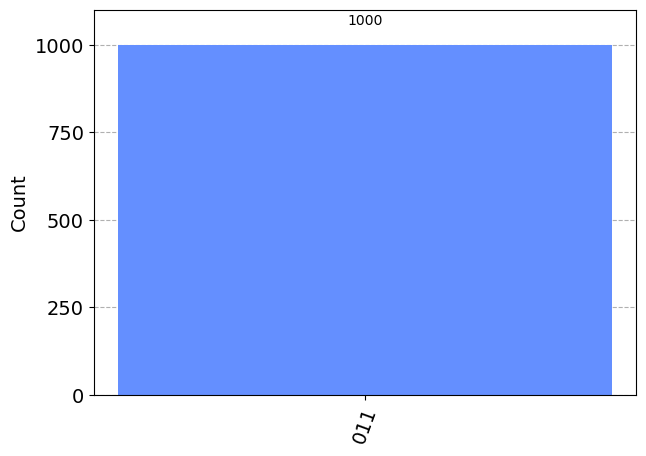

In [14]:
plot_histogram(counts)

If we have n data points and d features, e.g 


Data Point 1: [0, 1, 1, .....1]

Data Point 2: [1, 0, 1, .....0]
.
.
and so on. We can use basis encoding to encode the entire dataset. The quantum state of the circuit after the basis encoding will be a superposition of the computational basis states. 

The time complexity to prepare the entire dataset will be $O(n*d)$, and the number of qubits (space complexity) required to represent the entire dataset will be $O(d)$. The number of gates required to perform the basis encoding is $O(d)$.

Another encoding strategy similar to basis encoding is **Angle encoding**.

**Amplitude Encoding**

Input: numerical data (integers, floats)

Output: input encoded into the amplitudes of the states.

Using this approach, data is encoded into the amplitudes of a quantum system. An important point to note is that the total amplitude of a quantum state is 1. Therefore, before encoding the input data into the amplitudes of a quantum state, we have to normalize the input data. Let's see how we can perform amplitude encoding on our data: 


In [15]:
from pennylane.templates.embeddings import AmplitudeEmbedding

In [16]:
dev = pl.device('default.qubit', wires=3)

@pl.qnode(dev)
def amplitude_encoding(data):
  num_wires = int(np.log2(len(data)))
  pl.AmplitudeEmbedding(features=data, wires=range(num_wires), normalize=True)
  return pl.state()

In [17]:
data = [0, 1, 2, 3, 4, 5, 6, 7]
state = amplitude_encoding(data)
state

tensor([0.        +0.j, 0.08451543+0.j, 0.16903085+0.j, 0.25354628+0.j,
        0.3380617 +0.j, 0.42257713+0.j, 0.50709255+0.j, 0.59160798+0.j], requires_grad=True)

If we have n data points and d features, e.g

Data Point 1: [1.5, 0., 2.7, 9.1, .. 8.2]

Data Point 2: [4.5, 1., 9.5, 6.5, .. 4.1]
.
.
and so on. 

We can use amplitude encoding to encode the dataset. The quantum state of the circuit after state preparation technique using amplitude encoding will be a superposition of entire dataset normalized into the amplitudes of the quantum state. 

The time complexity to prepare the entire dataset is $\frac{O(n*d)}{O(log(n*d))}$, and the number of qubits to encode the entire dataset is $O(log(n*d))$. The number of gates (single qubit and two qubit gates) required for amplitude encoding is $O(n)$.

*Aside: We can map one terabyte of data into a quantum state using only 40 qubits (Video Link: https://www.youtube.com/watch?v=OstyW7c0v48&t=261s)*

Another encoding strategy for numerical data similar to amplitude encoding is **Hamiltonian Encoding**.  



---



Let's look at a few methods for represent images as quantum states: 

**Flexible Representation of Quantum Images (FRQI)**

Color information is encoded in the amplitudes of the qubits, and the position of the pixels is stored at the corresponding qubit. 

The following representation encodes an image in the following quantum state:

$$
\begin{gathered}
|I(\theta)\rangle=\frac{1}{2^{n}} \sum_{i=0}^{2^{2 n}-1}\left(\cos \theta_{i}|0\rangle+\sin \theta_{i}|1\rangle\right) \otimes|i\rangle \\
\theta_{i} \in\left[0, \frac{\pi}{2}\right], i=0,1, \cdots, 2^{2 n}-1
\end{gathered}
$$

RGB to theta: Divide into various sections on one color, and then the others are divided on top of that color. One method as shown here (https://www.cs.umd.edu/class/fall2018/cmsc657/projects/group_6.pdf) is: 

\begin{equation}
\theta=\left(\frac{\pi}{2}\right) \times\left(\frac{R}{256}+\frac{G}{256^{2}}+\frac{B}{256^{3}}\right)
\end{equation}

**Flexible Representation of Quantum Color Images (FRQCI)**
Color information is stores by two parameters. $Θ$ stores information related to Red, $Φ$ stores information related to Blue and Green. 

Qubit with color info: 
\begin{equation}
\cos \left(\theta_{k} / 2\right)+e^{i \phi_{k}} \sin \left(\theta_{k} / 2\right)
\end{equation}

Total number of qubits required are 2n+1 for image of size $2^n$ x $2^n$. 

e.g Let's take an example of the following 2x2 image: 

---





In [18]:
%%html
<iframe src="https://drive.google.com/file/d/1otDmGMUpV_zNpNKto5LZAc1pTRAzMXyY/preview" width="400" height="320" ></iframe>

In [19]:
image = np.array([[0, 1], [1, 0]])
image

array([[0, 1],
       [1, 0]])

$θ$=0 is all black and $θ$=$\frac{\pi}{2}$ is all white. We use 2 qubits for the position and 1 qubit for the color. In this case, the image quantum state is: $$I = cos(0)|000> + sin(90)|101> + sin(90)|110> + cos(0)|011>$$

In [20]:
def add_color(qc, theta):
  qc.cry(theta, 0, 2)
  qc.cx(0, 1)
  qc.cry(-theta, 1, 2)
  qc.cx(0, 1)
  qc.cry(theta, 1, 2)

In [21]:
class FRQICircuit():
    def __init__(self):        
        self.qc: QuantumCircuit = QuantumCircuit(3)
        self.num_parameters = 5
        self.num_qubits = 3
        # for all pixel white 
        theta = pi/2  # all pixels white
        self.qc.h(0)
        self.qc.h(1)
        self.qc.barrier()
        #Pixel 1

        self.qc.cry(theta,0,2)
        self.qc.cx(0,1)
        self.qc.cry(-theta,1,2)
        self.qc.cx(0,1)
        self.qc.cry(theta,1,2)

        self.qc.barrier()
        #Pixel 2

        self.qc.x(1)

        self.qc.cry(theta,0,2)
        self.qc.cx(0,1)
        self.qc.cry(-theta,1,2)
        self.qc.cx(0,1)
        self.qc.cry(theta,1,2)

        self.qc.barrier()

        self.qc.x(1)
        self.qc.x(0)
        self.qc.cry(theta,0,2)
        self.qc.cx(0,1)
        self.qc.cry(-theta,1,2)
        self.qc.cx(0,1)
        self.qc.cry(theta,1,2)


        self.qc.barrier()

        self.qc.x(1)

        self.qc.cry(theta,0,2)
        self.qc.cx(0,1)
        self.qc.cry(-theta,1,2)
        self.qc.cx(0,1)
        self.qc.cry(theta,1,2)

        self.qc.measure_all()

        
    def add_color(self, theta):
        self.qc.cry(theta, 0, 2)
        self.qc.cx(0, 1)
        self.qc.cry(-theta, 1, 2)
        self.qc.cx(0, 1)
        self.qc.cry(theta, 1, 2)
        
        self.qc.barrier()
        
    def mesure_and_draw(self):
        self.qc.measure_all()
        self.qc.draw()
    
    def get_circuit(self):
        return self.qc


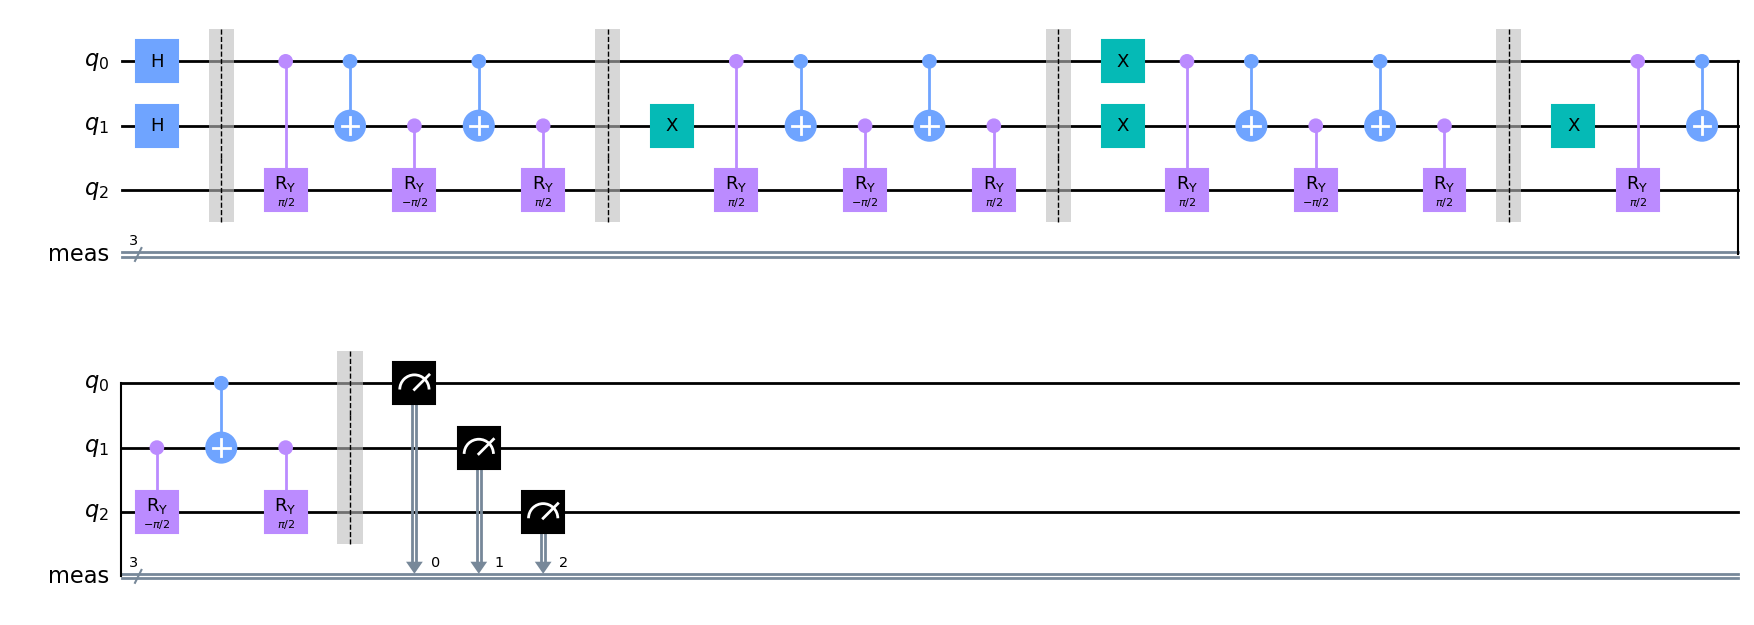

In [22]:
qc_frqi = FRQICircuit().get_circuit()

qc_frqi.draw('mpl')

In [23]:
counts = run_experiments(qc_frqi)
counts

{'111': 238, '100': 265, '110': 258, '101': 239}

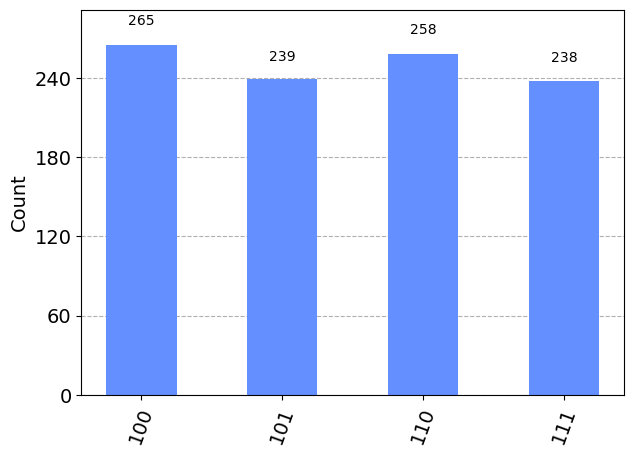

In [24]:
plot_histogram(counts)

In [25]:
class NEQRCircuit():
    def __init__(self):
        # Initialize the quantum circuit for the image 
        # Pixel position
        idx = QuantumRegister(2, 'idx')
        # grayscale pixel intensity value
        intensity = QuantumRegister(5,'intensity')
        # classical register
        cr = ClassicalRegister(7, 'cr')

        # create the quantum circuit for the image
        self.qc_image = QuantumCircuit(intensity, idx, cr)

        # set the total number of qubits
        self.num_qubits = self.qc_image.num_qubits

        # Initialize the quantum circuit

        # Optional: Add Identity gates to the intensity values
        for idx in range(intensity.size):
            self.qc_image.i(idx)

        # Add Hadamard gates to the pixel positions    
        self.qc_image.h(5)
        self.qc_image.h(6)

        # Separate with barrier so it is easy to read later.
        self.qc_image.barrier()
        # Encode the first pixel, since its value is 0, we will apply ID gates here:
        for idx in range(self.num_qubits):
            self.qc_image.i(idx)

        self.qc_image.barrier()
        # Encode the second pixel whose value is (01100100):
        value01 = '01100'

        # Add the NOT gate to set the position at 01:
        self.qc_image.x(self.qc_image.num_qubits-1)

        # We'll reverse order the value so it is in the same order when measured.
        for idx, px_value in enumerate(value01[::-1]):
            if(px_value=='1'):
                self.qc_image.ccx(self.num_qubits-1, self.num_qubits-2, idx)

        # Reset the NOT gate
        self.qc_image.x(self.num_qubits-1)

        self.qc_image.barrier()
        # Encode the third pixel whose value is (11001000):
        value10 = '11001'

        # Add the 0CNOT gates, where 0 is on X pixel:
        self.qc_image.x(self.num_qubits-2)
        for idx, px_value in enumerate(value10[::-1]):
            if(px_value=='1'):
                self.qc_image.ccx(self.num_qubits-1, self.num_qubits-2, idx)
        self.qc_image.x(self.num_qubits-2)


        self.qc_image.barrier()
        # Encode the third pixel whose value is (11111111):
        value11 = '11111'

        # Add the CCNOT gates:
        for idx, px_value in enumerate(value11):
            if(px_value=='1'):
                self.qc_image.ccx(self.num_qubits-1,self.num_qubits-2, idx)

        self.qc_image.barrier()
        #self.qc_image.measure(range(6),range(6))


        
    def get_circuit(self):
        return self.qc_image

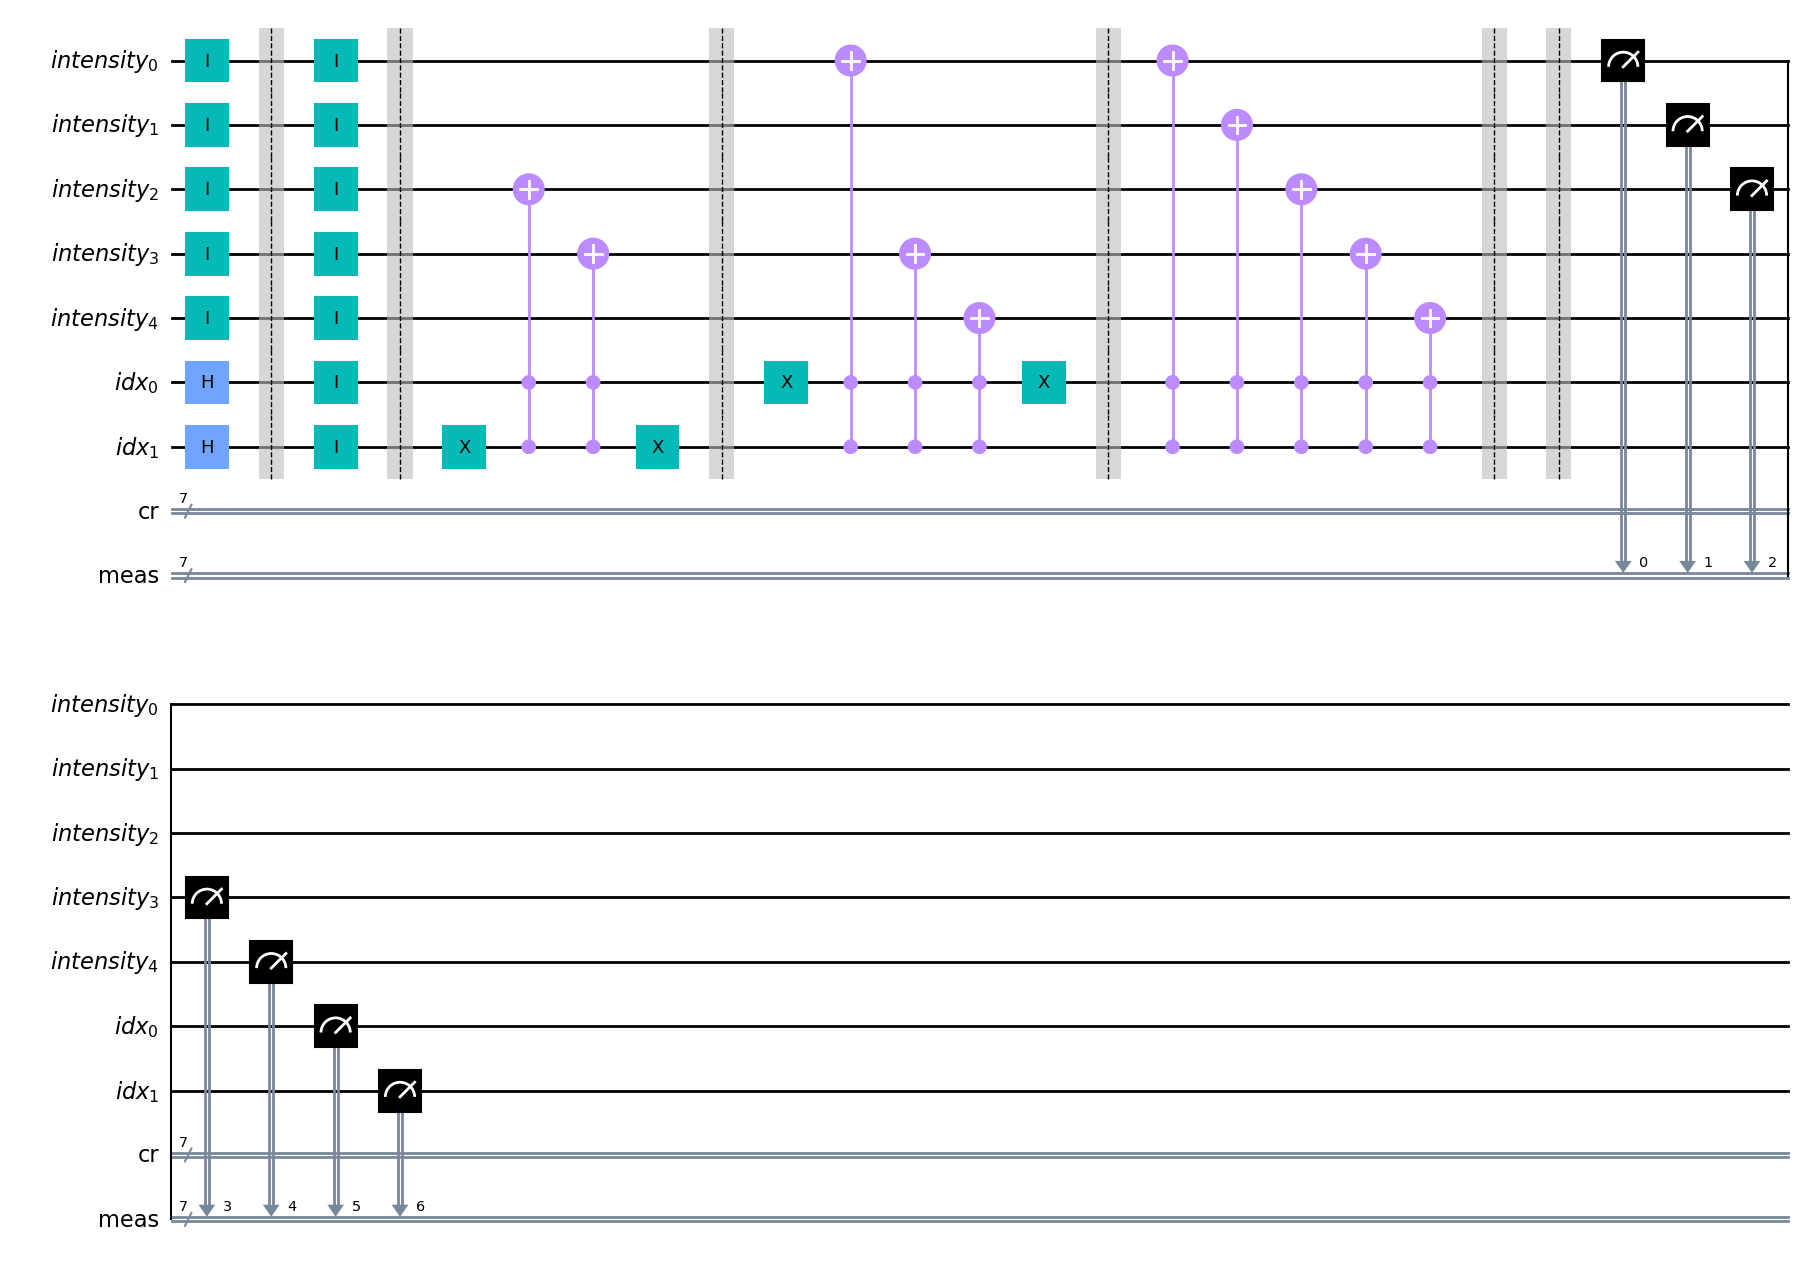

In [26]:
qc_neqr = NEQRCircuit().get_circuit()
qc_neqr.measure_all()
qc_neqr.draw('mpl')

In [27]:
counts = run_experiments(qc_neqr)
counts

{'0101100 0000000': 262,
 '0000000 0000000': 249,
 '1011001 0000000': 234,
 '1111111 0000000': 255}

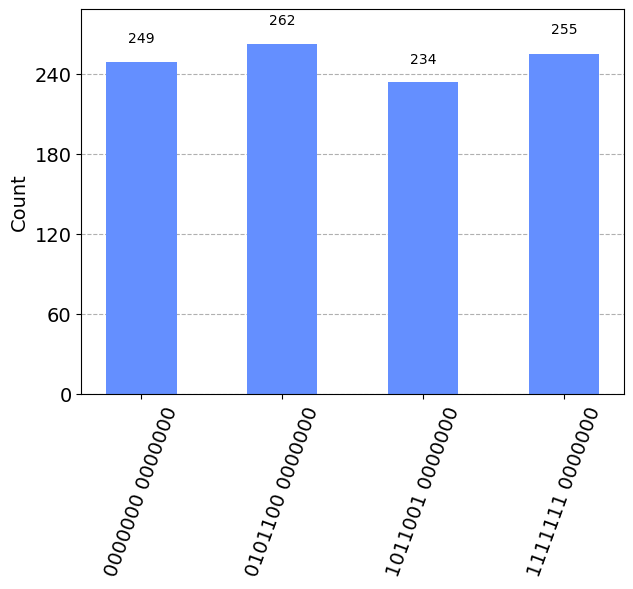

In [28]:
plot_histogram(counts)

*By utilizing the superposition effect, the FRQI representation space decreases exponentially compared to the classical image.*

A few more image representations are Novel Enhanced Quantum Representation (NEQR), Quantum Probability Image Encoding (QPIE). 

To represent a $2^n$ x $2^n$ image, the number of qubits required are 2n + 1. The number of controlled rotation gates are: $2^{2n}$.

---

Text Encoding using various degrees of syntactic information can be performed via [*lambeq*](https://https://cqcl.github.io/lambeq/tutorials/sentence-input.html) 



## Feature Maps

Neural Tangent Kernels (https://arxiv.org/abs/1806.07572) 

The idea that Neural Networks can be of infinite width with Neural Tangent Kernel. While observing the gradient updates, it is emperically observed that when m (width of the network) is large, then the weights of the network are almost static. The matrices change, but only slightly. In this case, the taylor approximation around the initial weights is similar to kernel methods.

A quantum feature map $ϕ(\overrightarrow{x})$ maps the classical data $\overrightarrow{x}$ to quantum state $|ϕ(\overrightarrow{x})><ϕ(\overrightarrow{x})|$. The quantum feature map of depth d is as follows:
$$
\mathcal{U}_{\Phi(\mathbf{x})}=\prod_{d} U_{\Phi(\mathbf{x})} H^{\otimes n}, U_{\Phi(\mathbf{x})}=\exp \left(i \sum_{S \subseteq[n]} \phi_{S}(\mathbf{x}) \prod_{k \in S} P_{k}\right)
$$

containing layers of Hadamard gates with entangling blocks of $\mathcal{U}_{\Phi(\mathbf{x})}$. (https://arxiv.org/pdf/1804.11326.pdf, https://europepmc.org/article/med/30768345, https://iopscience.iop.org/article/10.1088/2058-9565/ab4eb5/pdf) 

Due to the NISQ era, it is preferred to have low depth kernels to avoid the interference of noise. 



Let's see how we can use Feature Maps to perform Binary Classification on MNIST dataset. We will consider the digits 1 and 5 for our binary classification problem. 

In [29]:
def get_digits_1_5(dataset, num_samples):
  idx = np.append(np.where(dataset.targets == 1)[0][:num_samples], 
                np.where(dataset.targets == 5)[0][:num_samples])
  dataset.data = dataset.data[idx]
  dataset.targets = dataset.targets[idx]

  dataset.targets[dataset.targets == 1] = 0
  dataset.targets[dataset.targets == 5] = 1

  return dataset

In [30]:
dataset = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

dataset = get_digits_1_5(dataset, num_samples=60)
X_train, X_val = torch.utils.data.random_split(dataset, [100, 20])
train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val, batch_size=1, shuffle=False)

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
test_data = get_digits_1_5(X_test, num_samples=10)
test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=False)

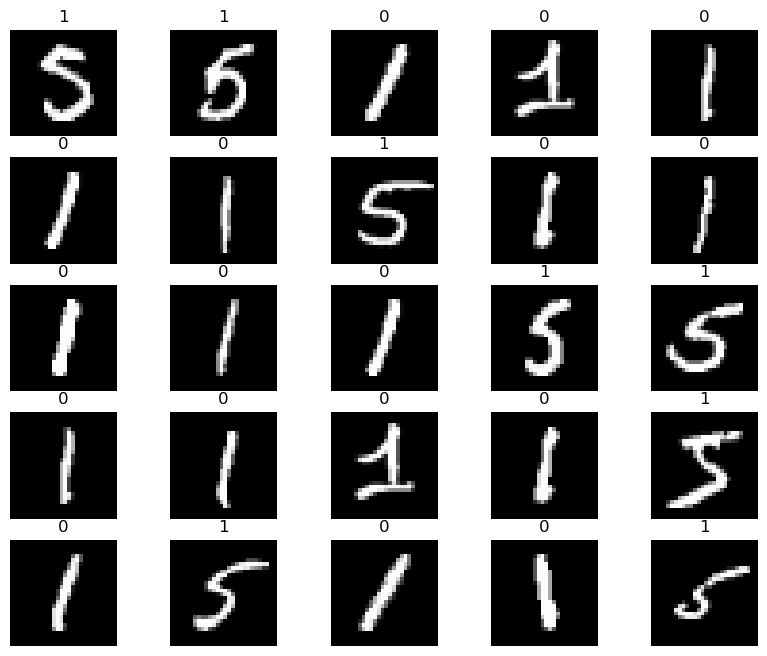

In [31]:
data = X_train

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx][0], data[sample_idx][1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [32]:
def get_images_labels(data):
    images = np.array(data[0][0].reshape(1, 784))
    labels = np.array(data[0][1])
    for i in range(1, len(data)):
        images = np.vstack((images, data[i][0].reshape(1, 784)))
        labels = np.append(labels, data[i][1])
    return images, labels

In [33]:
sample_train, labels_train = get_images_labels(X_train)
sample_val, labels_val = get_images_labels(X_val)
sample_test, labels_test = get_images_labels(X_test)

In [34]:
sample_train.shape

(100, 784)

In [35]:
# Standardize
standard_scaler = StandardScaler()
start_sample_train = standard_scaler.fit_transform(sample_train)
start_sample_val = standard_scaler.transform(sample_val)
start_sample_test = standard_scaler.transform(sample_test)

# Reduce dimensions
N_DIM = 5
pca = PCA(n_components=N_DIM)
sample_train = pca.fit_transform(start_sample_train)
sample_val = pca.transform(start_sample_val)
sample_test = pca.transform(start_sample_test)

# Normalize
min_max_scaler = MinMaxScaler((-1, 1))
sample_train = min_max_scaler.fit_transform(sample_train)
sample_val = min_max_scaler.transform(sample_val)
sample_test = min_max_scaler.transform(sample_test)

In [36]:
# Reduce dimensions for 3 feature in FRQI implementation todo inser into neural network
FRQI_N_DIM = 3
frqi_pca = PCA(n_components=FRQI_N_DIM)
frqi_sample_train = frqi_pca.fit_transform(start_sample_train)
frqi_sample_val = frqi_pca.transform(start_sample_val)
frqi_sample_test = frqi_pca.transform(start_sample_test)

# Normalize
min_max_scaler = MinMaxScaler((-1, 1))
frqi_sample_train = min_max_scaler.fit_transform(frqi_sample_train)
frqi_sample_val = min_max_scaler.transform(frqi_sample_val)
frqi_sample_test = min_max_scaler.transform(frqi_sample_test)

In [37]:
# Reduce dimensions for 10 feature in NEQR implementation verify for Neural network
NEQR_N_DIM = 5
neqr_pca = PCA(n_components=NEQR_N_DIM)
neqr_sample_train = neqr_pca.fit_transform(sample_train)
neqr_sample_val = neqr_pca.transform(sample_val)
neqr_sample_test = neqr_pca.transform(sample_test)

# Normalize
min_max_scaler = MinMaxScaler((-1, 1))
neqr_sample_train = min_max_scaler.fit_transform(neqr_sample_train)
neqr_sample_val = min_max_scaler.transform(neqr_sample_val)
neqr_sample_test = min_max_scaler.transform(neqr_sample_test)

In [38]:
# reps means how many number of times do you repeat the quantum circuit
zzfeat_map = ZZFeatureMap(feature_dimension=N_DIM, reps=3, entanglement='linear')
zfeat_map = ZFeatureMap(feature_dimension=N_DIM, reps=3)
pauli_map = PauliFeatureMap(feature_dimension=N_DIM, reps=3, paulis = ['X', 'Y', 'ZZ'])

quantum_instancez = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=8192, seed_simulator=1024, seed_transpiler=1024)

kernel_zzfeat = QuantumKernel(feature_map=zzfeat_map, quantum_instance=quantum_instancez)
kernel_zfeat = QuantumKernel(feature_map=zfeat_map, quantum_instance=quantum_instancez)
kernel_p_map = QuantumKernel(feature_map=pauli_map, quantum_instance=quantum_instancez)

svc = SVC(kernel='precomputed', probability=True)

matrix_train_zz = kernel_zzfeat.evaluate(x_vec=sample_train)
matrix_train_z = kernel_zfeat.evaluate(x_vec=sample_train)
matrix_train_pmap = kernel_p_map.evaluate(x_vec=sample_train)



svc.fit(matrix_train_zz, labels_train)
svc.fit(matrix_train_z, labels_train)
svc.fit(matrix_train_pmap, labels_train)


matrix_val_zzfeat = kernel_zzfeat.evaluate(x_vec=sample_val, y_vec=sample_train)
matrix_val_zfeat = kernel_zfeat.evaluate(x_vec=sample_val, y_vec=sample_train)
matrix_val_pmap = kernel_p_map.evaluate(x_vec=sample_val, y_vec=sample_train)

pauli_score_zzfeat = svc.score(matrix_val_zzfeat, labels_val)
pauli_score_zfeat = svc.score(matrix_val_zfeat, labels_val)
pauli_score_pmap = svc.score(matrix_val_pmap, labels_val)

print(f'Accuracy of ZZFeature Map: {pauli_score_zzfeat*100}%')
print(f'Accuracy of ZFeature Map: {pauli_score_zfeat*100}%')
print(f'Accuracy of Pauli Feature Map: {pauli_score_pmap*100}%')

'''
print('Feature map FRQI')


frqi_feat_map = FrqiFeatureMap(feature_dimension=N_DIM,)

kernel_frqi_map = QuantumKernel(feature_map=frqi_feat_map, quantum_instance=quantum_instancez)
matrix_train_frqi_map = kernel_frqi_map.evaluate(x_vec=sample_train)
svc.fit(matrix_train_frqi_map, labels_train)

matrix_val_frqi_map = kernel_p_map.evaluate(x_vec=sample_val, y_vec=sample_train)

pauli_score_frqi_map = svc.score(matrix_val_frqi_map, labels_val)

print(f'Accuracy of FRQI feature Map: {pauli_score_frqi_map*100}%')

'''


/var/folders/6_/rd9ym68j6r71z04zhvmw821r0000gn/T/ipykernel_1166/630228327.py:6: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instancez = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=8192, seed_simulator=1024, seed_transpiler=1024)


Accuracy of ZZFeature Map: 75.0%
Accuracy of ZFeature Map: 85.0%
Accuracy of Pauli Feature Map: 80.0%


"\nprint('Feature map FRQI')\n\n\nfrqi_feat_map = FrqiFeatureMap(feature_dimension=N_DIM,)\n\nkernel_frqi_map = QuantumKernel(feature_map=frqi_feat_map, quantum_instance=quantum_instancez)\nmatrix_train_frqi_map = kernel_frqi_map.evaluate(x_vec=sample_train)\nsvc.fit(matrix_train_frqi_map, labels_train)\n\nmatrix_val_frqi_map = kernel_p_map.evaluate(x_vec=sample_val, y_vec=sample_train)\n\npauli_score_frqi_map = svc.score(matrix_val_frqi_map, labels_val)\n\nprint(f'Accuracy of FRQI feature Map: {pauli_score_frqi_map*100}%')\n\n"

## Hybrid Quantum Classical Neural Networks

Lets look at an example on how to design a hybrid quantum classical neural network using MNIST data. 

We can add a quantum layer to solve an optimization problem along with other classical layers. This is similar to variational algorithms such as QAOA where we utilize the capability of Quantum Computers to solve combinatorial optimization problems.

The quantum layer will consist of rotation gates where each gate's rotation angle is a parameter that is learnt by the neural network.

In the QuantumLayer, instead of gradient descent, we will use the parameter shift rule. (https://arxiv.org/pdf/2107.12390.pdf, https://arxiv.org/abs/1905.13311) 


In [39]:
NUM_QUBIT = 2

In [40]:
class QuantumLayer(nn.Module):
    def __init__(self, shift, circuit = 0):
        super(QuantumLayer, self).__init__()
        self.shift = shift
        self.theta = qiskit.circuit.Parameter('theta')
        self.qc_circuit = self.quantum_circuit(circuit)
        self.thetas = []
        self.result = 0
        self.shots = 100
        self.get_params_shift()
    
    def get_params_shift(self):
        self.params_shift = np.repeat(self.shift, len(self.thetas))
        self.params_shift_right = np.add(self.thetas, self.params_shift)
        self.params_shift_left = np.subtract(self.thetas, self.params_shift)
        
    def quantum_circuit(self, circuit):
        n_qubits = NUM_QUBIT
        thetas = {k : Parameter('theta'+str(k))for k in range(2*n_qubits)}
    
        if circuit == 0:
            qc_circuit = QuantumCircuit(n_qubits)

            all_qubits = [i for i in range(n_qubits)]
            qc_circuit.h(all_qubits)

            for k in range(0, n_qubits):
                qc_circuit.rz(thetas[k] , k)

            #qc_circuit.barrier()

            qc_circuit.cx(0, 1)


            #qc_circuit.barrier()

            #qc_circuit.cz(1, 0)

            for k in range(0, n_qubits):
                qc_circuit.rz(thetas[k+n_qubits], k)
                

            qc_circuit.measure_all()
            qc_circuit.measure_all()

        elif circuit == 1:
            qc_circuit = FRQICircuit().get_circuit()
            
            for k in range(0, n_qubits):
                qc_circuit.rz(thetas[k] , k)


            for k in range(0, n_qubits):
                qc_circuit.rz(thetas[k+n_qubits], k)
                
            qc_circuit.measure_all()
            qc_circuit.measure_all()
                

        elif circuit == 2: 
            qc_circuit = NEQRCircuit().get_circuit()
            
            for k in range(0, 3):
                qc_circuit.rz(thetas[k] , k)
            qc_circuit.rz(thetas[3] , [3,4])

                
            qc_circuit.measure_all()
            qc_circuit.measure_all()

        return qc_circuit
    
    def get_circuit(self):
        return self.qc_circuit
    
    def forward(self, input):
        self.thetas = input[0].tolist()
        self.result = self.run_experiments(self.thetas)

        return Variable(self.result.float(), requires_grad=True)
    
    def backward(self, prev_grad):
        grads = []

        for i in range(len(self.thetas)):
            grad = torch.tensor([self.run_experiments(self.params_shift_right)]) - \
                   torch.tensor([self.run_experiments(self.params_shift_left)])

            grads.append(grad)

        grads = np.array([grads]).T

        return torch.tensor([grads]).float() * prev_grad.float(), None, None
    
    def run_experiments(self, thetas):    
        backend = Aer.get_backend('aer_simulator')

        transpiled_qc = transpile(self.qc_circuit, backend)
        #parameter_binds=[{'parameter_binds': [{self.theta: thetas}]}]

        #self.qc_circuit.bind_parameters([thetas])

        parameter_binds=[{'parameter_binds': [{self.theta: theta} for theta in thetas]}]

        self.qc_circuit.bind_parameters([theta for theta in thetas])

        # If using qiskit <= 0.39, comment the above line and uncomment the line below, 
        # and use assembled_qc in backend.run()

        #assembled_qc = assemble(transpiled_qc, shots=self.shots, 
        #                        parameter_binds=[{self.theta: theta} for theta in thetas])

        job = backend.run(transpiled_qc, validate=False, shots=self.shots)

        result = job.result().get_counts()

        counts = np.array(list(result.values()))

        keys = list(result.keys())
        key = []
        for index, _ in enumerate(keys):
            key.append(keys[index].split(' ')[0])

        states = np.array(list(key)).astype(float)

        probabilities = counts / self.shots

    #    expectation = np.sum(states * probabilities)
        expectation = states * probabilities


        return torch.tensor([np.array(expectation)])

### Circuito base

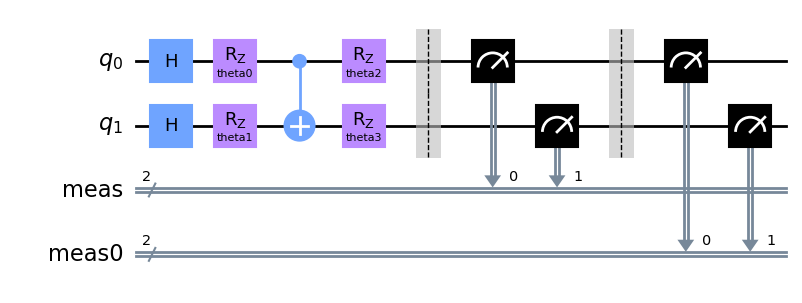

In [41]:
circuit = QuantumLayer(np.pi/2,0).get_circuit()

circuit.draw('mpl')

### Circuito FRQI

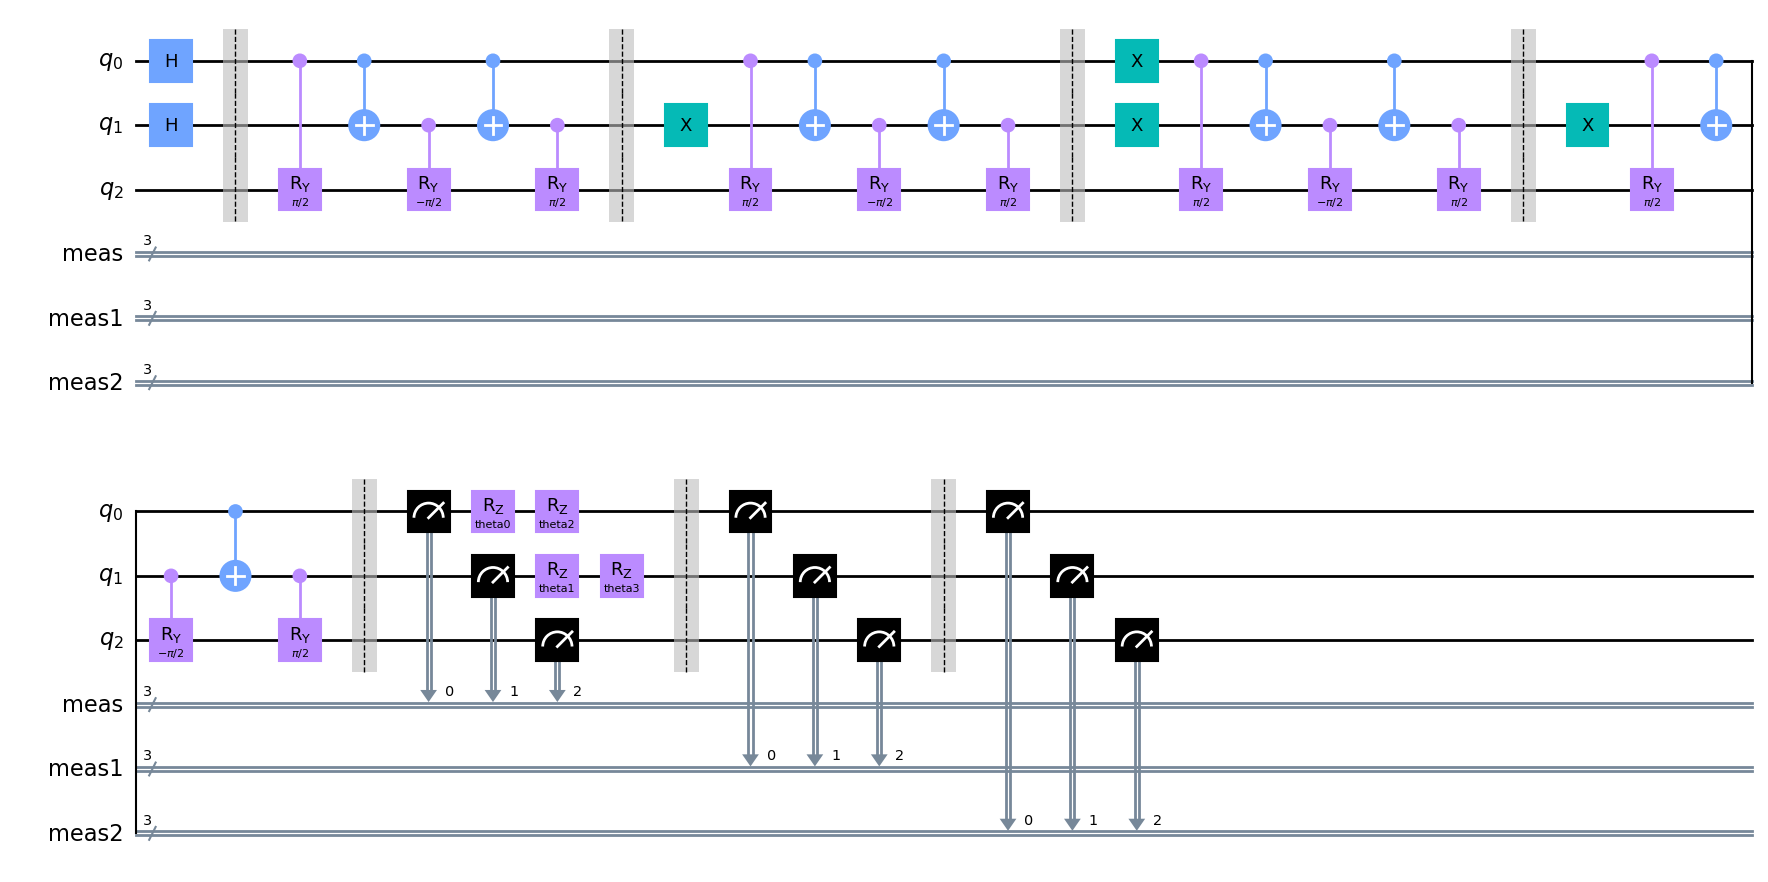

In [42]:
circuit = QuantumLayer(np.pi/2,1).get_circuit()

circuit.draw('mpl')

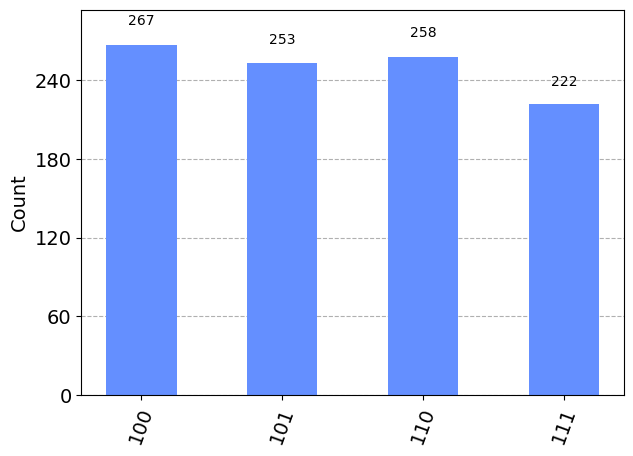

In [45]:
counts = run_experiments(qc_frqi)
counts
plot_histogram(counts)

### Circuito NEQR

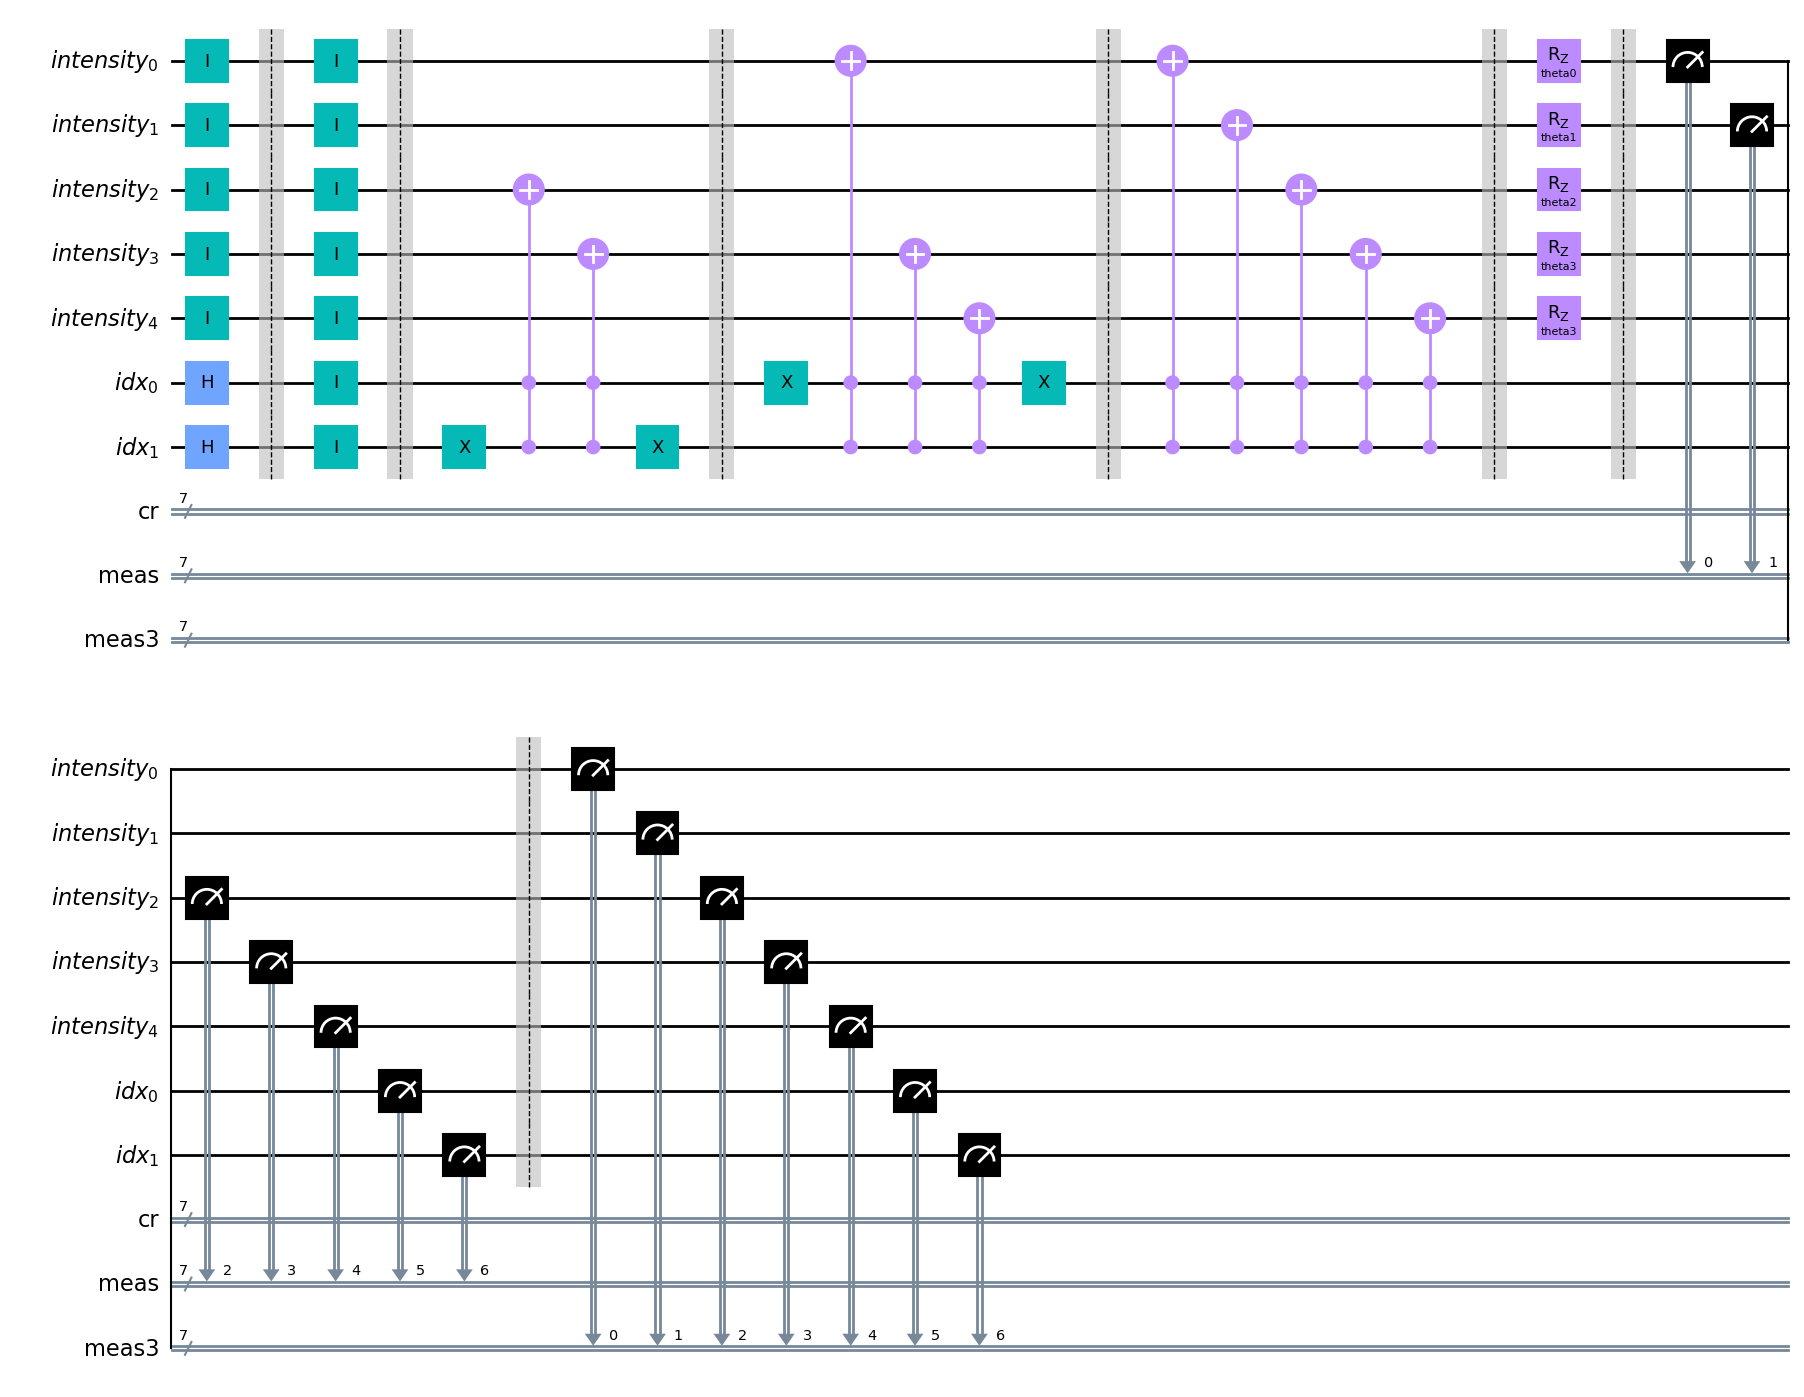

In [46]:
circuit = QuantumLayer(np.pi/2,2).get_circuit()

circuit.draw('mpl')

In [47]:
counts = run_experiments(qc_frqi.get_circuit())
counts
plot_histogram(counts)

AttributeError: 'QuantumCircuit' object has no attribute 'get_circuit'

In [48]:
class QMLModel(nn.Module):
  def __init__(self, circuit = 0):
    super(QMLModel, self).__init__()
    self.shots = 1000
    self.seed = 42
    self.model = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3),
        nn.ReLU(),
        #nn.MaxPool2d(2, 2),
        nn.Flatten(),
        
        nn.Linear(576, 64),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        
        nn.Linear(64, 2*NUM_QUBIT),
        nn.ReLU(),
        
        QuantumLayer(np.pi/2, circuit),
        
        nn.Dropout(p=0.2),
        nn.Linear(4, 4),
        nn.Dropout(p=0.1),
        
        #nn.Softmax(dim=1),
        
        #nn.LogSoftmax(dim=1),
    )
  
  def forward(self, input):
    out = self.model(input)
    return torch.cat((out, 1 - out), -1)    
    #return out

In [49]:
def train_model(train_loader, model, criterion, optimizer, device):
    training_loss = 0
    # print ("------------------------------------training started--------------------------------------")
    # Set model in 'Training mode'
    model.train()
    
    start_time = time.time()
    # enumerate mini batches
    for i, (inputs, targets) in enumerate(train_loader):

        # clear the gradients
        optimizer.zero_grad()
        
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # compute the model output
        out = model(inputs)
        
        # calculate loss
        loss = criterion(out, targets)
        
        # Backward pass
        loss.backward()
        
        # Update model weights
        optimizer.step()

        training_loss += loss.item()
        
    training_loss /= len(train_loader)
    end_time = time.time()
    # print (f"train time for 1 epoch: {end_time - start_time}") 
    # print ("------------------------------------training complete--------------------------------------")
    return training_loss

In [50]:
# Evaluate the model
def evaluate_model(val_loader, model, criterion, device):
    val_loss = 0
    
    predictions = []
    actuals = []
    # print ("------------------------------------eval started--------------------------------------")
    # Set model in validation mode
    model.eval()
    
    start_time = time.time()
    
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(val_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)

            # evaluate the model on the validation set
            out = model(inputs)

            # Calculate validation loss
            loss = criterion(out, targets)

            # retrieve numpy array
            out = out.cpu().detach().numpy()
            actual = targets.cpu().detach().numpy()
            
            # convert to class labels
            out = np.argmax(out, axis=1)

            # reshape for stacking
            actual = actual.reshape(-1, 1)
            out = out.reshape(-1, 1)
            
            # store
            predictions.append(out)
            actuals.append(actual)
            
            val_loss += loss.item()
            
            
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    
    val_loss /= len(val_loader)
    
    # Calculate validation accuracy
    acc = (predictions == actuals).mean()
    end_time = time.time()
    # print (f"eval time for 1 epoch: {end_time - start_time}")
    # print ("------------------------------------eval complete--------------------------------------")
    return acc, val_loss

In [51]:
def get_digits(dataset, num_samples):
    idx = np.append([np.where(dataset.targets == 1)[0][:num_samples],
                    np.where(dataset.targets == 3)[0][:num_samples],
                    np.where(dataset.targets == 4)[0][:num_samples]],
                    np.where(dataset.targets == 5)[0][:num_samples])
    dataset.data = dataset.data[idx]
    
    dataset.targets = dataset.targets[idx]

    #Reformat with class
    dataset.targets[dataset.targets == 1] = 0
    dataset.targets[dataset.targets == 3] = 1
    dataset.targets[dataset.targets == 4] = 2
    dataset.targets[dataset.targets == 5] = 3
    
    return dataset

In [52]:
batch_size = 1
dataset = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

dataset = get_digits(dataset, num_samples=60)


X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
test_data = get_digits(X_test, num_samples=40)

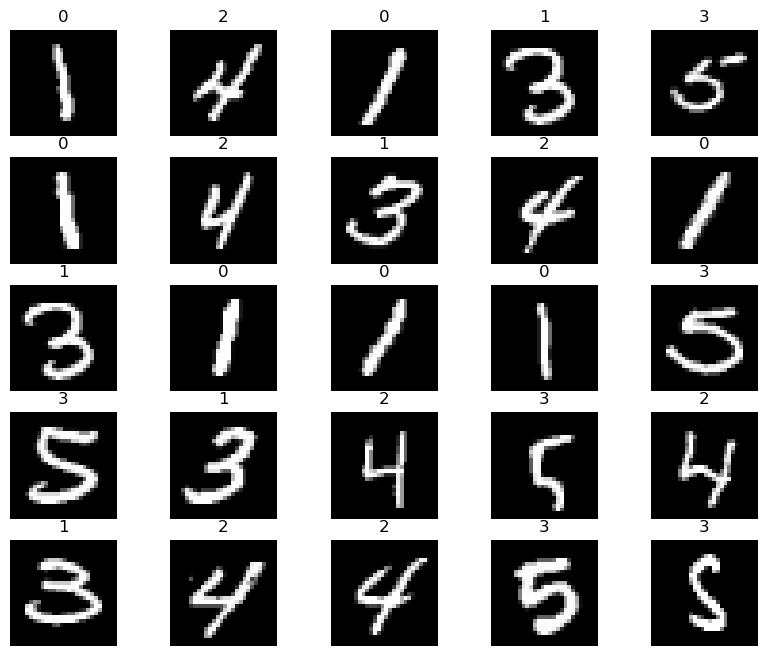

In [53]:
data = dataset

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx][0], data[sample_idx][1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [54]:
#dataset.data = dataset.data/255

#test_data.data = test_data.data/255

X_train, X_val = torch.utils.data.random_split(dataset, [200, 40])

train_loader = torch.utils.data.DataLoader(X_train,batch_size=batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(X_val,batch_size=batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, shuffle=False)

## Codifica di base

In [55]:
model = QMLModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()


epochs = 15
loss_list = []
train_losses = []
val_losses = []
accuracy = []

device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(val_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore: {best_model_accuracy * 100}%')

/var/folders/6_/rd9ym68j6r71z04zhvmw821r0000gn/T/ipykernel_1166/344034028.py:132: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  return torch.tensor([np.array(expectation)])


Epoch: 0, Training loss: 2.3036056214571, Val loss: 2.2197087585926054
Epoch: 1, Training loss: 2.174941545724869, Val loss: 1.9876675814390183
Epoch: 2, Training loss: 1.9811386010050773, Val loss: 1.9383571535348891
Epoch: 3, Training loss: 1.7718356230854988, Val loss: 1.8091839417815208
Epoch: 4, Training loss: 1.7371488925814629, Val loss: 1.6424039855599404
Epoch: 5, Training loss: 1.8155808797478676, Val loss: 1.6642347037792207
Epoch: 6, Training loss: 1.7653482112288474, Val loss: 1.6621658444404601
Epoch: 7, Training loss: 1.6592627519369125, Val loss: 1.7064397394657136
Epoch: 8, Training loss: 1.6115832155942917, Val loss: 1.562702140212059
Epoch: 9, Training loss: 1.639196819961071, Val loss: 1.5396433800458909
Epoch: 10, Training loss: 1.7226759910583496, Val loss: 1.5068393856287003
Epoch: 11, Training loss: 1.6272227507829666, Val loss: 1.544461077451706
Epoch: 12, Training loss: 1.6514630278944968, Val loss: 1.5070143669843674
Epoch: 13, Training loss: 1.67161017864942

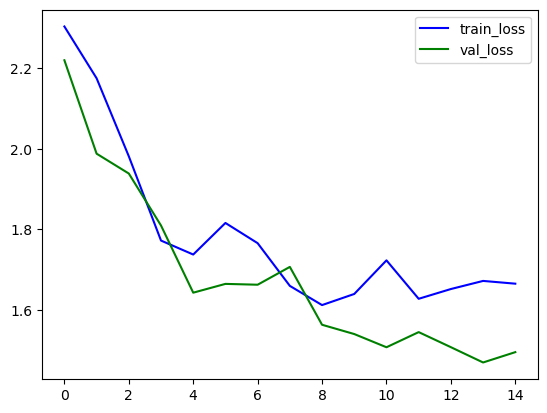

In [56]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

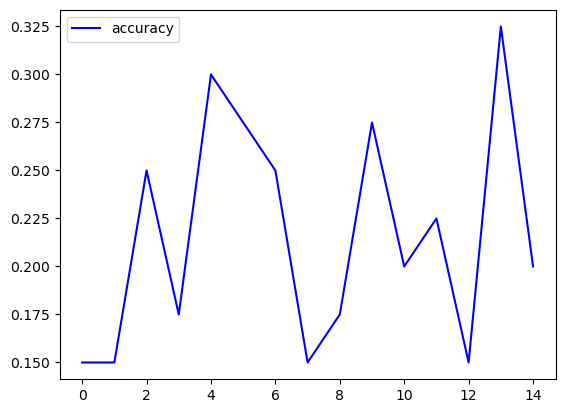

In [57]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## FRQICircuit implementazione 

In [58]:
model = QMLModel(1)
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()


epochs = 15
loss_list = []
train_losses = []
val_losses = []
accuracy = []

device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(val_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore: {best_model_accuracy * 100}%')

Epoch: 0, Training loss: 9.312064496527972, Val loss: 3.5856863857246934
Epoch: 1, Training loss: 8.878841715761567, Val loss: 2.623956148279831
Epoch: 2, Training loss: 7.165221543750892, Val loss: 2.3813530035316943
Epoch: 3, Training loss: 7.572612642123901, Val loss: 2.5525546880438923
Epoch: 4, Training loss: 6.083311243530644, Val loss: 2.6373380377888678
Epoch: 5, Training loss: 5.761177791494056, Val loss: 1.900681335479021
Epoch: 6, Training loss: 4.027842401555463, Val loss: 1.9398239217698574
Epoch: 7, Training loss: 3.789554796633165, Val loss: 1.526049629598856
Epoch: 8, Training loss: 2.840294442289742, Val loss: 1.6075231686234475
Epoch: 9, Training loss: 2.4900233998452315, Val loss: 1.3713646337389946
Epoch: 10, Training loss: 2.362524463534355, Val loss: 1.3833001494407653
Epoch: 11, Training loss: 1.6899576512724162, Val loss: 1.4190056711435317
Epoch: 12, Training loss: 1.8549929128587246, Val loss: 1.4248489528894424
Epoch: 13, Training loss: 1.8272428365051747, Va

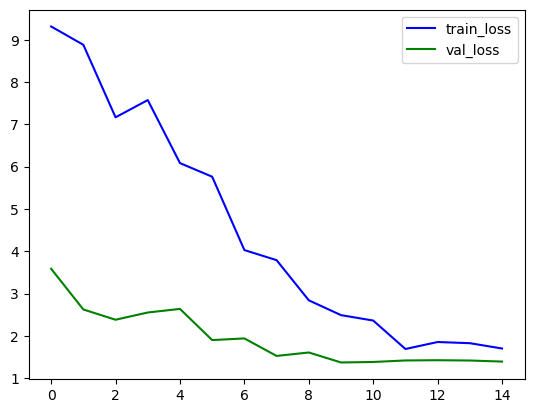

In [59]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

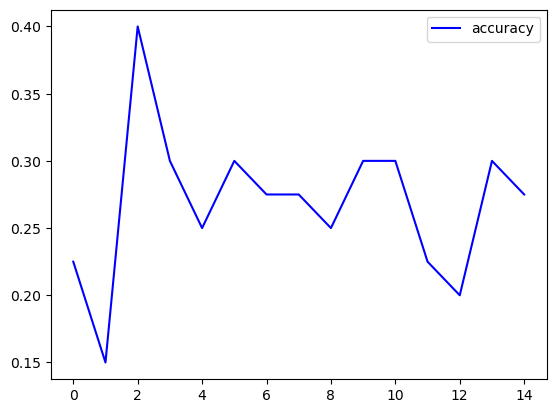

In [60]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## implementazione NEQR

In [61]:
model = QMLModel(2)
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()


epochs = 15
loss_list = []
train_losses = []
val_losses = []
accuracy = []

device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(val_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore: {best_model_accuracy * 100}%')

Epoch: 0, Training loss: 160451.18180722237, Val loss: 80776.10224609375
Epoch: 1, Training loss: 114217.43003895521, Val loss: 67518.3341796875
Epoch: 2, Training loss: 88158.86252765656, Val loss: 43190.40283203125
Epoch: 3, Training loss: 61782.86535153747, Val loss: 49488.09453125
Epoch: 4, Training loss: 53168.657767602206, Val loss: 23429.817529296874
Epoch: 5, Training loss: 36108.263626708984, Val loss: 19844.46530761719
Epoch: 6, Training loss: 23555.809273712635, Val loss: 10439.205688476562
Epoch: 7, Training loss: 16285.537681975366, Val loss: 3339.9973388671874
Epoch: 8, Training loss: 10226.514773232602, Val loss: 3190.5312622070314
Epoch: 9, Training loss: 6464.893878493309, Val loss: 818.6989013671875
Epoch: 10, Training loss: 4556.42078987807, Val loss: 864.1945587158203
Epoch: 11, Training loss: 6563.916700289846, Val loss: 757.6990472540259
Epoch: 12, Training loss: 5392.483802362084, Val loss: 744.5480682373047
Epoch: 13, Training loss: 4987.986724205017, Val loss: 

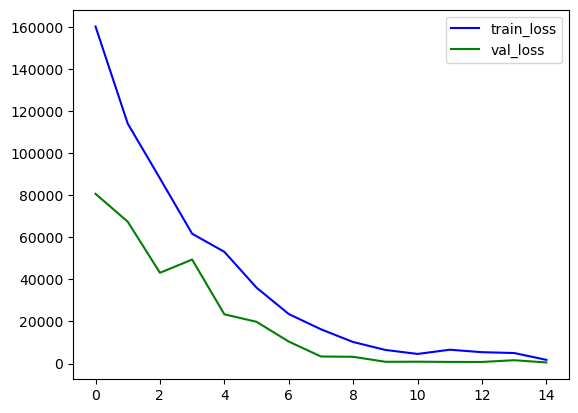

In [62]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

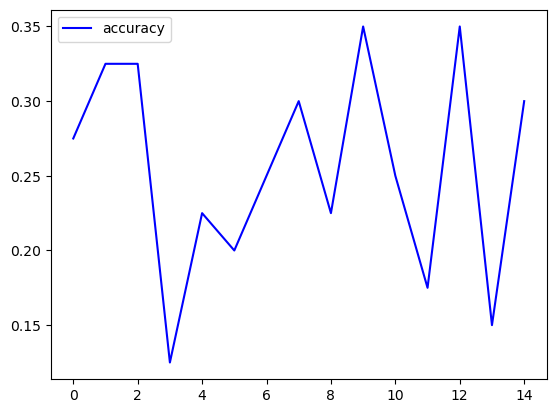

In [63]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

# QNN with PCA 3 dimension 

In [64]:
dataset = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

dataset = get_digits(dataset, num_samples=60)
X_train, X_val = torch.utils.data.random_split(dataset, [200, 40])

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
X_test = get_digits(X_test, num_samples=40)
test_data, _ = torch.utils.data.random_split(X_test, [160, 0])

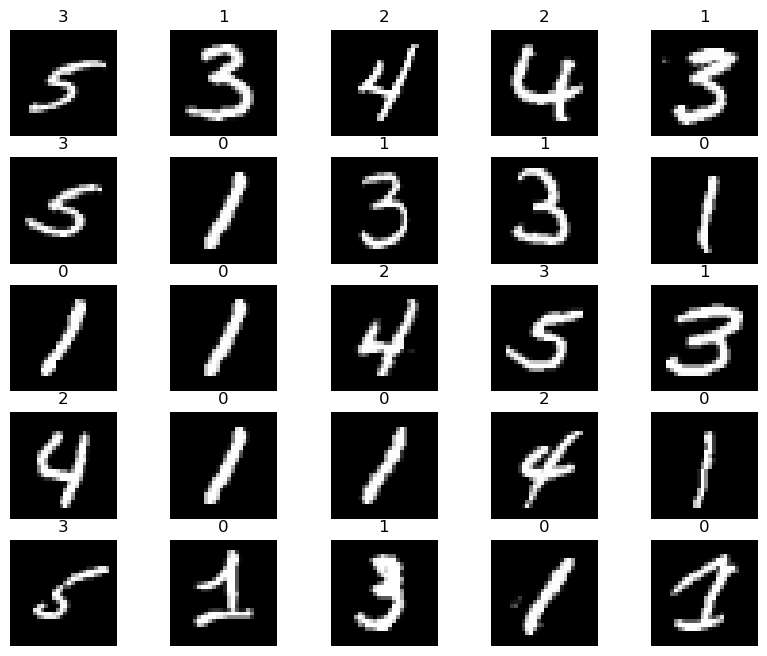

In [65]:
data = dataset

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx][0], data[sample_idx][1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [66]:
def get_images_labels(data):
    images = np.array(data[0][0].reshape(1, 784))
    labels = np.array(data[0][1])
    for i in range(1, len(data)):
        images = np.vstack((images, data[i][0].reshape(1, 784)))
        labels = np.append(labels, data[i][1])
    return images, labels

In [67]:
sample_train, labels_train = get_images_labels(X_train)
#samplet_train = sample_train / 255

sample_val, labels_val = get_images_labels(X_val)
#sample_val = sample_val / 255

sample_test, labels_test = get_images_labels(test_data)
#sample_test = sample_test / 255

In [68]:
# Standardize
standard_scaler = StandardScaler()
start_sample_train = standard_scaler.fit_transform(sample_train)
start_sample_val = standard_scaler.transform(sample_val)
start_sample_test = standard_scaler.transform(sample_test)


N_DIM = 3
pca = PCA(n_components=N_DIM)
sample_train = pca.fit_transform(start_sample_train)
sample_val = pca.transform(start_sample_val)
sample_test = pca.transform(start_sample_test)

# Normalize
min_max_scaler = MinMaxScaler((-1, 1))
sample_train = min_max_scaler.fit_transform(sample_train)
sample_val = min_max_scaler.transform(sample_val)
sample_test = min_max_scaler.transform(sample_test)

In [69]:
X_train.data = sample_train
X_train.targets = labels_train

X_val.data = sample_val
X_val.targets = labels_val

test_data.data = sample_test
test_data.targets = labels_test

In [70]:
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

## Implementazione base

In [71]:
model = QMLModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()

epochs = 14
loss_list = []
train_losses = []
val_losses = []
device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

accuracy = []

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(test_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore {best_model_accuracy * 100} %')

Epoch: 0, Training loss: 2.3467567884922027, Val loss: 2.061312795057893
Epoch: 1, Training loss: 2.0944101652503013, Val loss: 1.7516377136111259
Epoch: 2, Training loss: 1.9756531828641892, Val loss: 1.724151999503374
Epoch: 3, Training loss: 1.896307728588581, Val loss: 1.651237639784813
Epoch: 4, Training loss: 1.715259060561657, Val loss: 1.5694803323596715
Epoch: 5, Training loss: 1.8038864210247993, Val loss: 1.583429356664419
Epoch: 6, Training loss: 1.7575010645389557, Val loss: 1.5658947736024857
Epoch: 7, Training loss: 1.6893171721696854, Val loss: 1.5248225718736648
Epoch: 8, Training loss: 1.7474477145075797, Val loss: 1.4951109617948533
Epoch: 9, Training loss: 1.687937268614769, Val loss: 1.501134429126978
Epoch: 10, Training loss: 1.651843394935131, Val loss: 1.501257687434554
Epoch: 11, Training loss: 1.667565547823906, Val loss: 1.4746685728430748
Epoch: 12, Training loss: 1.6179710215330123, Val loss: 1.4899834915995598
Epoch: 13, Training loss: 1.604154183268547, V

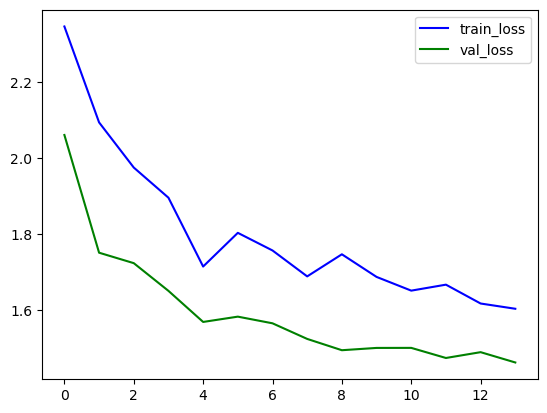

In [72]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

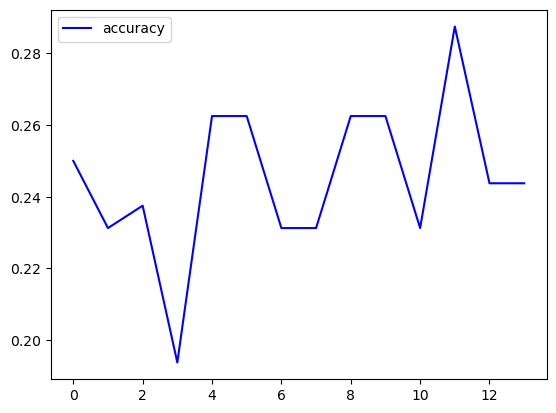

In [73]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## FRQICircuit implementazione 

In [74]:
model = QMLModel(1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()

epochs = 14
loss_list = []
train_losses = []
val_losses = []
device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

accuracy = []

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(test_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore {best_model_accuracy * 100} %')

Epoch: 0, Training loss: 12.06166878885528, Val loss: 4.832800747515284
Epoch: 1, Training loss: 8.162561238899697, Val loss: 2.727209116856102
Epoch: 2, Training loss: 6.39094999863178, Val loss: 2.942053114436567
Epoch: 3, Training loss: 6.482152940871772, Val loss: 2.686680708779022
Epoch: 4, Training loss: 6.225369231732056, Val loss: 2.078212869656272
Epoch: 5, Training loss: 5.799094557683919, Val loss: 2.0348372472956724
Epoch: 6, Training loss: 4.888319362411421, Val loss: 1.8981798608787357
Epoch: 7, Training loss: 4.325167186108229, Val loss: 2.123385990038514
Epoch: 8, Training loss: 3.4978082177740544, Val loss: 1.6319065406918525
Epoch: 9, Training loss: 3.204306570077315, Val loss: 1.7590714955702424
Epoch: 10, Training loss: 3.1436362675084273, Val loss: 1.6303283227607608
Epoch: 11, Training loss: 2.709659776352346, Val loss: 1.4851445194333792
Epoch: 12, Training loss: 2.590949698248878, Val loss: 1.5341237921267747
Epoch: 13, Training loss: 2.0233982234448193, Val los

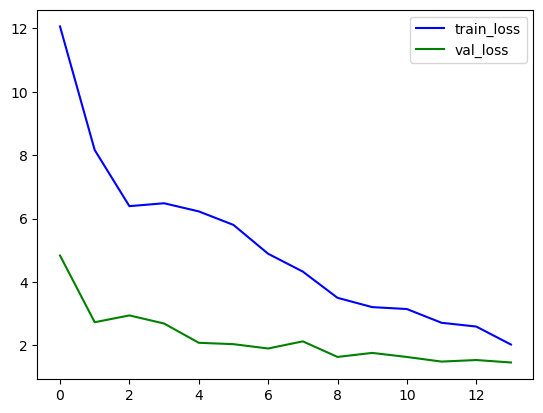

In [75]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

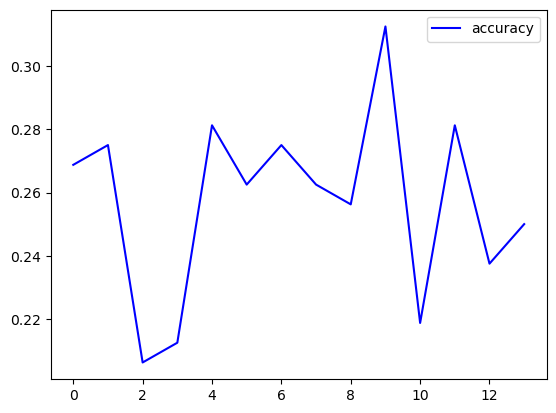

In [76]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## implementazione NEQR

In [77]:
model = QMLModel(2)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()

epochs = 14
loss_list = []
train_losses = []
val_losses = []
device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

accuracy = []

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(test_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore {best_model_accuracy * 100} %')

Epoch: 0, Training loss: 175708.55077491046, Val loss: 126782.49064941406
Epoch: 1, Training loss: 123121.49175569534, Val loss: 72182.09353027344
Epoch: 2, Training loss: 91301.47808556796, Val loss: 45991.213342285155
Epoch: 3, Training loss: 71453.40303708076, Val loss: 43928.09268798828
Epoch: 4, Training loss: 63860.87951038001, Val loss: 31990.431884765625
Epoch: 5, Training loss: 53608.42930703401, Val loss: 23623.148974609376
Epoch: 6, Training loss: 36747.455964357854, Val loss: 14831.790649533272
Epoch: 7, Training loss: 19704.331770220993, Val loss: 10820.197619628907
Epoch: 8, Training loss: 18649.086961510253, Val loss: 8419.388854980469
Epoch: 9, Training loss: 14604.376185882576, Val loss: 4699.726062011719
Epoch: 10, Training loss: 11752.318394277096, Val loss: 3947.2989013671877
Epoch: 11, Training loss: 12694.188037370046, Val loss: 3276.807958984375
Epoch: 12, Training loss: 7834.204421876811, Val loss: 1834.5399412395898
Epoch: 13, Training loss: 6694.294810717594, 

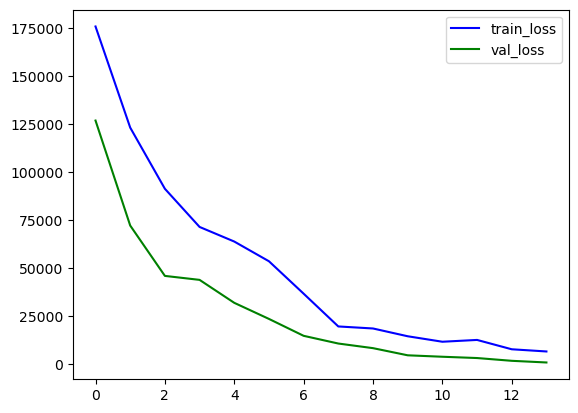

In [78]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

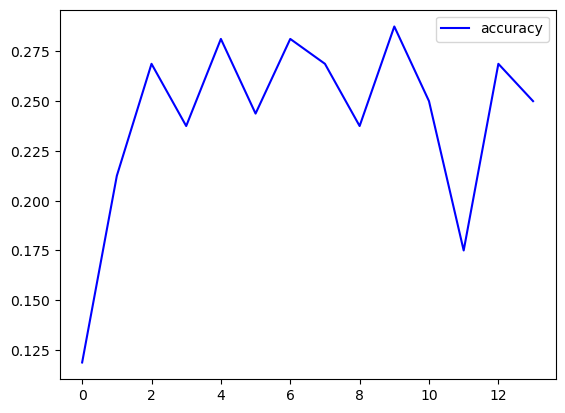

In [79]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

# QNN with PCA 5 dimension 

In [80]:
dataset = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

dataset = get_digits(dataset, num_samples=60)
X_train, X_val = torch.utils.data.random_split(dataset, [200, 40])

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
X_test = get_digits(X_test, num_samples=40)
test_data, _ = torch.utils.data.random_split(X_test, [160, 0])

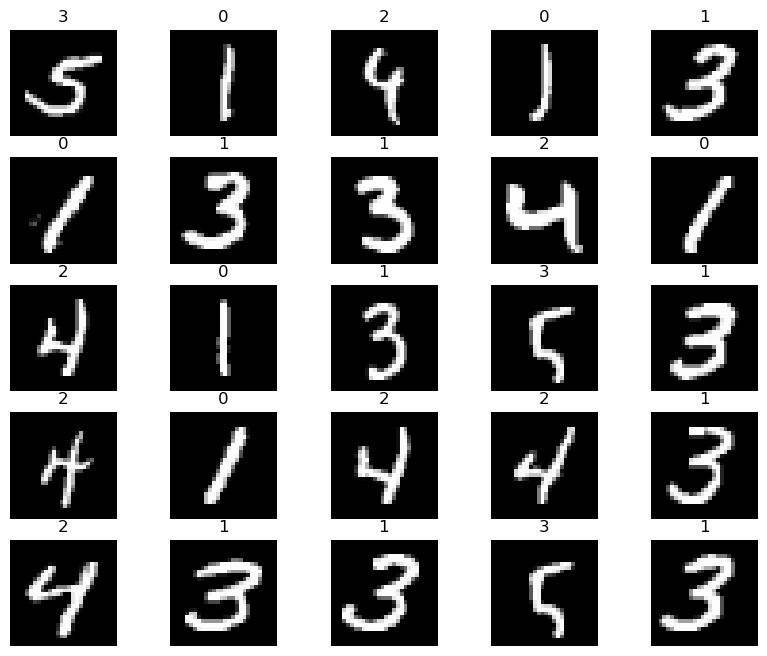

In [81]:
data = dataset

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx][0], data[sample_idx][1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [82]:
sample_train, labels_train = get_images_labels(X_train)
#samplet_train = sample_train / 255

sample_val, labels_val = get_images_labels(X_val)
#sample_val = sample_val / 255

sample_test, labels_test = get_images_labels(test_data)
#sample_test = sample_test / 255

In [83]:
# Standardize
standard_scaler = StandardScaler()
start_sample_train = standard_scaler.fit_transform(sample_train)
start_sample_val = standard_scaler.transform(sample_val)
start_sample_test = standard_scaler.transform(sample_test)


N_DIM = 5
pca = PCA(n_components=N_DIM)
sample_train = pca.fit_transform(start_sample_train)
sample_val = pca.transform(start_sample_val)
sample_test = pca.transform(start_sample_test)

# Normalize
min_max_scaler = MinMaxScaler((-1, 1))
sample_train = min_max_scaler.fit_transform(sample_train)
sample_val = min_max_scaler.transform(sample_val)
sample_test = min_max_scaler.transform(sample_test)

In [84]:
X_train.data = sample_train
X_train.targets = labels_train

X_val.data = sample_val
X_val.targets = labels_val

test_data.data = sample_test
test_data.targets = labels_test

In [85]:
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

## Implementazione base

In [86]:
model = QMLModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()

epochs = 14
loss_list = []
train_losses = []
val_losses = []
device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

accuracy = []

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(test_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore {best_model_accuracy * 100} %')

Epoch: 0, Training loss: 3.55307635307312, Val loss: 3.072759860754013
Epoch: 1, Training loss: 2.780926123857498, Val loss: 2.378176009654999
Epoch: 2, Training loss: 2.379736559391022, Val loss: 2.074614464119077
Epoch: 3, Training loss: 2.0375329676270484, Val loss: 1.843731763958931
Epoch: 4, Training loss: 1.8887053376436234, Val loss: 1.7040512192994357
Epoch: 5, Training loss: 1.7729421451687812, Val loss: 1.6329371321946382
Epoch: 6, Training loss: 1.7234394106268882, Val loss: 1.5872693285346031
Epoch: 7, Training loss: 1.744625845849514, Val loss: 1.5409908428788186
Epoch: 8, Training loss: 1.6399022275209427, Val loss: 1.565402414649725
Epoch: 9, Training loss: 1.667189530134201, Val loss: 1.4884548336267471
Epoch: 10, Training loss: 1.660705489218235, Val loss: 1.5086900822818279
Epoch: 11, Training loss: 1.681288641989231, Val loss: 1.4890934258699418
Epoch: 12, Training loss: 1.5754228314757348, Val loss: 1.4844339177012444
Epoch: 13, Training loss: 1.5360944455862044, Va

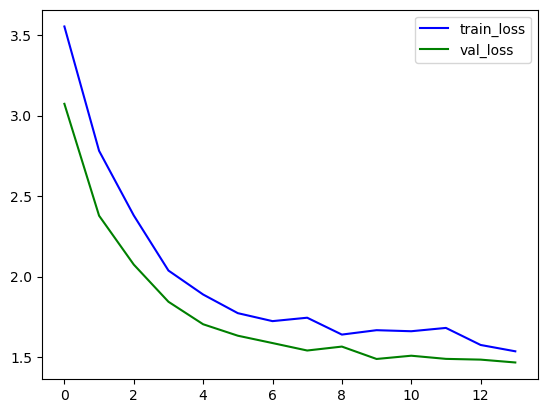

In [87]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

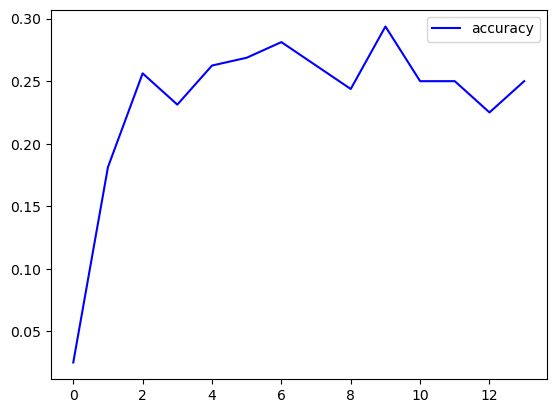

In [88]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## Implementazione FQRI

In [ ]:
model = QMLModel(1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()

epochs = 14
loss_list = []
train_losses = []
val_losses = []
device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

accuracy = []

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(test_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore {best_model_accuracy * 100} %')

Epoch: 0, Training loss: 7.419283456563007, Val loss: 2.106214225664735
Epoch: 1, Training loss: 5.902001350648898, Val loss: 1.8708908268250526
Epoch: 2, Training loss: 5.616532035060736, Val loss: 1.7264740785583854


In [ ]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

In [ ]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## Implementazione NEQR 

In [ ]:
model = QMLModel(2)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=10)
criterion = nn.CrossEntropyLoss()

epochs = 14
loss_list = []
train_losses = []
val_losses = []
device = torch.device("cpu")
model.to(device)


best_model_accuracy = 0.0
best_model = None

accuracy = []

for epoch in range(epochs):
    start_time = time.time()
        
    # Train
    training_loss = train_model(train_loader, model, criterion, optimizer, device)
    train_losses.append(training_loss)

    # Validation
    val_acc, val_loss = evaluate_model(test_loader, model, criterion, device)
    val_losses.append(val_loss)

    # scheduler
    scheduler.step(val_acc)
    
    accuracy.append(val_acc)

    if val_acc > best_model_accuracy:
      best_model_accuracy =val_acc
      best_model = model

    print(f"Epoch: {epoch}, Training loss: {training_loss}, Val loss: {val_loss}")
    
    end_time = time.time()
    
print(f'Accuratezza migliore {best_model_accuracy * 100} %')

In [ ]:
plt.plot(np.arange(epochs), train_losses, 'b', label='train_loss' )
plt.plot(np.arange(epochs), val_losses, 'g', label='val_loss' )

plt.legend()
plt.show()

In [ ]:
plt.plot(np.arange(epochs), accuracy, 'b', label='accuracy' )

plt.legend()
plt.show()

## Hybrid QNNs
imported quiskit implementation of qnn using dataset from previous task 
For the time being, it only works with classical binary classification

In [ ]:
manual_seed(42)

n_samples = 100  # We will concentrate on the first 100 samples

# Use pre-defined torchvision function to load MNIST train data
X_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    [np.where(X_train.targets == 0)[0][:n_samples], np.where(X_train.targets == 1)[0][:n_samples],
    np.where(X_train.targets == 2)[0][:n_samples]],
    [np.where(X_train.targets == 3)[0][:n_samples]]
)

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

#Define test
X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    [np.where(X_train.targets == 0)[0][:n_samples], np.where(X_train.targets == 1)[0][:n_samples],
    np.where(X_train.targets == 2)[0][:n_samples]],
    [np.where(X_train.targets == 3)[0][:n_samples]]
)

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test,batch_size=batch_size, shuffle=False)

In [ ]:
# Define and create QNN

def create_qnn():
    feature_map = ZZFeatureMap(4, reps=4)
    ansatz = RealAmplitudes(4, reps=4)

    qc = QuantumCircuit(4,4)

    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)


    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn = create_qnn()

In [ ]:
# Define torch NN module


class Net(nn.Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=5)
        self.conv2 = nn.Conv2d(2, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 4)  # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        # uniformly at random from interval [-1,1].
        self.fc3 = nn.Linear(4, 4)  # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # apply QNN
        print(x)
        x = F.relu(self.fc3(x))
        #x = self.fc3(x)
        x = F.softmax(x, dim=-1)
        return torch.cat((x, 1 - x), -1)


model = Net(qnn)

In [ ]:
# Define model, optimizer, and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

# Start training
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

In [ ]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

In [ ]:
model.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

In [ ]:
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(data[0].numpy().squeeze(), cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

### Quanvolutional Neural Networks

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1HkNzAcifpf6B-6ic-VWudIPQeWEWRVjS/preview" width="600" height="400" ></iframe>

Image Source: https://pennylane.ai/qml/demos/tutorial_quanvolution.html 

The main idea is that we create a quantum circuit that takes the inputs from each section of the image, performs a unitary operation which can be a highly complex quantum kernel, and the output is associated with different channels. This is similar to CNNs having different kernels that are applied to the entire image to get the output channels. 

For example, in the above image: a 2x2 section of the image is encoded as a parameterized quantum circuit, and a unitary matrix is applied which outputs 4 classical bits. This can be interpreted as having 4 kernels being applied to the image. Similar to the QNN Model above, QCNN can be a single layer stacked among other classical layers. 

## Thank You!

##### For further questions, feel free to reach out at prabh.baweja@gmail.com, bhikshar@andrew.cmu.edu, djustice@andrew.cmu.edu